## Accessing and Modifying Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

index = range(101, 108)

In [3]:
df = pd.DataFrame(data, index=index)

In [4]:
df.index = np.arange(10, 17)

In [5]:
df['name']

10    Xavier
11       Ann
12      Jana
13        Yi
14     Robin
15      Amal
16      Nori
Name: name, dtype: object

In [6]:
df.name

10    Xavier
11       Ann
12      Jana
13        Yi
14     Robin
15      Amal
16      Nori
Name: name, dtype: object

To access rows, we have to use the `.loc` method, and this sort of works using list notation. If I want to access the first row of the DataFrame, I just pass in the **label**.

In [7]:
df.loc[10]

name             Xavier
city        Mexico City
age                  41
py-score           88.0
Name: 10, dtype: object

I’m going to get an error and that’s because the `0` integer, so this actual object, the `0`, is not a label name of the index. `0` is not a valid index label. The labels are `10, 11, 12`, etc. If I want to access an individual row, I'll use `.loc` accessor method and use the actual label name.

That means that the actual labels of the indices or the index, they can be any type of hashable Python object. So it can be any string, an integer. I want to access the row with label 11, then I would use that with the `.loc` accessor method. 
`.loc` can also be used to access subsets of your DataFrame, or a sub-DataFrame, just like you would with a NumPy array. And again, with `.loc`, they have to be actual labels of the rows and labels of the columns.

In [8]:
df.loc[:, ['age', 'py-score']]

,age,py-score
10,41,88.0
11,28,79.0
12,33,81.0
13,34,80.0
14,38,68.0
15,31,61.0
16,37,84.0


So I would have a comma separator, and then here I would pass in the row labels and here I would pass in the column labels, just like a two-dimensional NumPy array. If I wanted to get all of the rows of the columns for, say, the age and the py-score, I’m passing in a list containing the two column names `'age`' and `'py-score'`.

Now let’s suppose I wanted to pick off, say, only the rows where the labels are, say, multiples of 2 or are even. So to do that, I could go `df.loc()`.

In [9]:
df.loc[[x for x in df.index if not x % 2]]

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
12,Jana,Prague,33,81.0
14,Robin,Manchester,38,68.0
16,Nori,Osaka,37,84.0


I want to pick off the labels, so I’ll say `x for x`in the `.index `if the index label, which is going to be an integer, is a multiple of `2`, and so I’ll use the modulo operator `(%)` and then pass in not, because `x % 2`, if it’s even, I’m going to get `0` and so I want to flip the Boolean value from False to True. So that will pick off only the row labels that are multiples of `2`. And so there we go. We get `10, 12, 14, 16`.

And then if I wanted, say, let’s say you wanted only the name and the city columns, then we would pass in the second part to the `.loc` accessor method, and so then we get just the name and the city columns where the row labels are even. So with `.loc`, the key thing to remember is that the actual values that you pass in to `.loc` have to be the actual labels of either the row and the column.

In [10]:
df.loc[[x for x in df.index if not x % 2], ['name', 'city']]

,name,city
10,Xavier,Mexico City
12,Jana,Prague
14,Robin,Manchester
16,Nori,Osaka


### Accessing Values in DataFrame

Ppandas also provides a way for you to access the data or the values of a DataFrame by using integer indices instead of, say, label indices. To do this, you have to use the `.iloc` accessor method. In order to do this, again, we need to specify two different indices separated by a comma. The first one is going to be the rows and the second one is going to be the columns.

This is now going to be exactly the same as you would when you’re accessing values from a NumPy array. You have to use integers.

In [11]:
df.iloc[0]

name             Xavier
city        Mexico City
age                  41
py-score           88.0
Name: 10, dtype: object

And I can also pick off only the first row but I want only the first and the third columns.

In [12]:
df.iloc[0,[0,2]]

name    Xavier
age         41
Name: 10, dtype: object

 If I wanted all of the rows of the first and third column, then I would just use the colon notation that would give me all of the rows.

In [13]:
df.iloc[:,[0,2]]

,name,age
10,Xavier,41
11,Ann,28
12,Jana,33
13,Yi,34
14,Robin,38
15,Amal,31
16,Nori,37


Using the `.iloc` method, if I wanted to access say the first and the third rows, we would think, “Okay, maybe 10 and 12, and we want to get all of the columns.” Then I’m going to get an error, because 10 and 12—these are not actual integer indices starting from 0 of this DataFrame. 10 and 12 are the actual row labels, which just happen to be integers.

In [14]:
df.iloc[[0, 2],:]

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
12,Jana,Prague,33,81.0


Using `.iloc` and `.loc`, you can access individual cells or values of a DataFrame. So, for example, if I wanted to get the value in the row label 12, and maybe the city, then I would simply pass in 12, '`city`'. 


In [15]:
df.loc[12, 'city']

'Prague'

However, when you only need a single value like this, `pandas` recommends using specialized accessor methods called `.at` and `.iat`. With `.at`, you would use the same notation. So in this case, it would be 12 and `'city'`.

In [16]:
df.at[12, 'city']

'Prague'

In [17]:
df.iat[2, 1]

'Prague'

With `.at`, you have to pass in again row labels and column labels, but if you wanted to pass integer-based indices, you would use `.iat`.

Basically, `.at` and `.iat` are the same thing as `.loc` and `.iloc`, except here, you’re going to get individual elements always.



### Modifying Values in DataFrames: Accessor Methods

In [18]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


Say that we wanted to change the rows that are from the first row up until the row with label 13—so in this case, we would be changing the first four rows—and we want to change the py-score column.

In [19]:
df.loc[:13, 'py-score'] = [40, 50, 60, 70]


This would correspond to changing four rows. Let’s suppose we change these to 40, 50, 60, and 70. And then we also wanted to change the rows that follow, so this would be from the row with label 14 all the way up until the last row. And we want to change, again, the same column py-score. And then after this, we want all of the rows to be set to 0.

In [20]:
df.loc[14:, 'py-score'] = 0

Instead of passing in a sequence type that would have three elements of 0, we can pass in one single value of 0.

In [21]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,40.0
11,Ann,Toronto,28,50.0
12,Jana,Prague,33,60.0
13,Yi,Shanghai,34,70.0
14,Robin,Manchester,38,0.0
15,Amal,Cairo,31,0.0
16,Nori,Osaka,37,0.0


This time, let’s use the .iloc accessor method. Let’s change the last column, so I want all of the rows of the last column, and I’m going to use the -1 index, which is similar notation to how you would access the last element of a list.

We’ll modify this column using a NumPy array. I’m going to use the linspace() method, which creates a NumPy array from an initial value, say of 20, all the way up to 50, and the number of values between the range 20 and 50 has to be equal to the number of rows in our DataFrame.

In [22]:
df.iloc[:, -1] = np.linspace(20, 50, len(df))


If we use the length method on the DataFrame, this is going to give us the number of rows of the DataFrame. linspace() returns a NumPy array where the elements in the array are evenly spaced numbers over some specified interval. So in this case, we want the interval to start at 20 and then end at 50, and then it’ll return that many points evenly spaced throughout that interval. 

That changes the last column. And so if we take a look at the DataFrame, now we’ve got that last column starting at 20 to 50, equally spaced, so in this case, the step size had to be five.


Now, of course, we can also change rows, so let’s change maybe a row. Let me save in a row, and I’ll call this, say, old_row. Let’s pick off the last row.

I want to save that row because I want to make sure that I put my DataFrame back to how it was, and this will also just be more practice with accessing and saving rows and reassigning values to rows.

I’m going to change that last row with label 16 to a new row. That’s going to reassign the row at label 16, and let’s also view the DataFrame after we modify that last row.

In [23]:
old_row = df.loc[16]

I can go ahead and change that row back to like it was, so I’m going to use the same accessor method, label 16, and let’s just put the old row back to where it was.

In [24]:
df.loc[16] = ['Jack', 'Chicago', 29, 70]
df

,name,city,age,py-score
10,Xavier,Mexico City,41,20.0
11,Ann,Toronto,28,25.0
12,Jana,Prague,33,30.0
13,Yi,Shanghai,34,35.0
14,Robin,Manchester,38,40.0
15,Amal,Cairo,31,45.0
16,Jack,Chicago,29,70.0


In [25]:
df.loc[16] = old_row
df

,name,city,age,py-score
10,Xavier,Mexico City,41,20.0
11,Ann,Toronto,28,25.0
12,Jana,Prague,33,30.0
13,Yi,Shanghai,34,35.0
14,Robin,Manchester,38,40.0
15,Amal,Cairo,31,45.0
16,Nori,Osaka,37,50.0


Now, of course, if we wanted to change individual cells of a DataFrame, we could use, say, the .loc method if we knew the row labels. So for example, let’s suppose we wanted to change the city for the row label 11, which corresponds to Ann, so this is row label 11, and we want to change the 'city' value, and Ann is not actually from Toronto, she is from Ottawa.

And if we ran that and then checked out our DataFrame, now the city value in row labeled 11 has a value of Ottawa.

In [26]:
df.loc[11, 'city'] = 'Ottawa'

In [27]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,20.0
11,Ann,Ottawa,28,25.0
12,Jana,Prague,33,30.0
13,Yi,Shanghai,34,35.0
14,Robin,Manchester,38,40.0
15,Amal,Cairo,31,45.0
16,Nori,Osaka,37,50.0


### Deleting and Inserting Rows in a DataFrame

In [28]:
type(df.loc[16])

pandas.core.series.Series

This is a Series object, a pandas Series object. 

In [29]:
type(df['age'])

pandas.core.series.Series

And the same thing for a column—for example, the age column. 
A Series object is like a NumPy array that has labels—access labels. These are called the index. 

If I take a look at the last row, the index is going to be the columns of the DataFrame where we extracted the Series object. In this case, it’s name, city, age, and py-score.

In [30]:
df.loc[16]

name         Nori
city        Osaka
age            37
py-score     50.0
Name: 16, dtype: object

Notice that it’s got this Name attribute, which in this case is 16, which corresponds to the row label in the original DataFrame.

If I take a look at .name here, we’re going to get 16.

In [31]:
df.loc[16].name

16

If we do a similar thing with the column .name is going to be 'age'. 


In [32]:
df['age'].name

'age'

If we see the whole thing, in this case, the index is going to be 10 through 16.


In [33]:
df['age']

10    41
11    28
12    33
13    34
14    38
15    31
16    37
Name: age, dtype: int64

A pandas DataFrame hence is just a collection of Series objects, whether you view them as rows or whether you view them as columns.

This gives us a way to think about how we can add either rows or columns to a DataFrame. Let’s suppose we wanted to add a new row corresponding to a new job candidate. This is going to be a job candidate named john. Let’s create a Series object, so we call the constructor Series() from the pandas module.

In [34]:
john = pd.Series(data=['John', 'Boston', 34, 79], index=df.columns, name=17)

Now, we also want to give this series a index. And in this case, because we’re going to be creating a new row that we’re going to be adding to the DataFrame, we want the index… As we saw, when we pull out a row, we want the index to be the same as the column labels of the DataFrame.

We’re going to pass in for the keyword argument index the column labels of our DataFrame, which we know we can access via the .columns method.

And then we’re going to pass in a new name, and the name is going to be the row label that we want to associate with this new row that we’re going to be adding, which, in this case, we’re going to put as 17. 



We’ll add this using the .append() method. A very similar way to think about this as appending an element to a list.

In [35]:
df = df.append(john)

We’re appending a row, and this is going to be a Series object, to the DataFrame, but it’s going to return a new DataFrame.

We’re going to redefine the new DataFrame to be the same df that we’ve been using all along. And so if we take a look at the DataFrame.


In [36]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,20.0
11,Ann,Ottawa,28,25.0
12,Jana,Prague,33,30.0
13,Yi,Shanghai,34,35.0
14,Robin,Manchester,38,40.0
15,Amal,Cairo,31,45.0
16,Nori,Osaka,37,50.0
17,John,Boston,34,79.0


To drop a row, we’re going to use the .drop() method.

If we go .drop() and then we pass in what labels, what rows, we want to drop, we pass in a keyword argument for labels, and this can be a list or it can be a single label. And if we want, we’ll save this in the same name df. And in this case, what’s happening is .drop() is going to retain a new DataFrame, and so we can simply reassign the value of df. So by default, the .drop() method returns the pandas DataFrame with the specified rows removed.

In this case, we’re just removing one with label 17. But there’s also a keyword argument called inplace, which actually exists for many of the methods in pandas. The default value is False, and so if we were to pass a value of True, then in this case, the original DataFrame will be modified by removing that row, and what you’ll get is your return value of None.

In [37]:
df.drop(labels=[17], inplace=True)

In [38]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,20.0
11,Ann,Ottawa,28,25.0
12,Jana,Prague,33,30.0
13,Yi,Shanghai,34,35.0
14,Robin,Manchester,38,40.0
15,Amal,Cairo,31,45.0
16,Nori,Osaka,37,50.0


### Deleting and Inserting Columns in a DataFrame

If we want to add a new column, we would simply create this new column by passing in the name of the column and then the data for that column.

In [39]:
df['js-score'] = [71.0, 95.0, 88.0, 91.0, 80.0, 79.0, 77.0]
df

,name,city,age,py-score,js-score
10,Xavier,Mexico City,41,20.0,71.0
11,Ann,Ottawa,28,25.0,95.0
12,Jana,Prague,33,30.0,88.0
13,Yi,Shanghai,34,35.0,91.0
14,Robin,Manchester,38,40.0,80.0
15,Amal,Cairo,31,45.0,79.0
16,Nori,Osaka,37,50.0,77.0


Let’s suppose that we later wanted to add, say, some sort of total score column to the DataFrame.

In [40]:
df['total-score'] = 0.0
df

,name,city,age,py-score,js-score,total-score
10,Xavier,Mexico City,41,20.0,71.0,0.0
11,Ann,Ottawa,28,25.0,95.0,0.0
12,Jana,Prague,33,30.0,88.0,0.0
13,Yi,Shanghai,34,35.0,91.0,0.0
14,Robin,Manchester,38,40.0,80.0,0.0
15,Amal,Cairo,31,45.0,79.0,0.0
16,Nori,Osaka,37,50.0,77.0,0.0


We get a new column labeled total-score, all the values set to 0.0. Now notice that when we add a new column, by default, it gets placed at the very end.

If it’s important to you to add a column at a particular location, then you can use the .insert() method. So, df.insert().

We need to pass in the location of the column where we want to add it at. Let’s suppose we wanted to add this at position 4, so we’ll pass in a value of 4 for the loc keyword argument.

In [41]:
df.insert(loc=4, column='django-score', value =[71.0, 95.0, 88.0, 91.0, 80.0, 79.0, 77.0])
df

,name,city,age,py-score,django-score,js-score,total-score
10,Xavier,Mexico City,41,20.0,71.0,71.0,0.0
11,Ann,Ottawa,28,25.0,95.0,95.0,0.0
12,Jana,Prague,33,30.0,88.0,88.0,0.0
13,Yi,Shanghai,34,35.0,91.0,91.0,0.0
14,Robin,Manchester,38,40.0,80.0,80.0,0.0
15,Amal,Cairo,31,45.0,79.0,79.0,0.0
16,Nori,Osaka,37,50.0,77.0,77.0,0.0


So notice, 0, 1, 2, 3, 4 is the position of where this new column was added. 
 
Now let’s talk about deleting the columns.

Let’s suppose we wanted to delete that total-score column. We can use del (delete), and then the name of the column. 

In [42]:
del df['total-score']
df

,name,city,age,py-score,django-score,js-score
10,Xavier,Mexico City,41,20.0,71.0,71.0
11,Ann,Ottawa,28,25.0,95.0,95.0
12,Jana,Prague,33,30.0,88.0,88.0
13,Yi,Shanghai,34,35.0,91.0,91.0
14,Robin,Manchester,38,40.0,80.0,80.0
15,Amal,Cairo,31,45.0,79.0,79.0
16,Nori,Osaka,37,50.0,77.0,77.0


In [43]:
df['total-score'] = 0.0
df

,name,city,age,py-score,django-score,js-score,total-score
10,Xavier,Mexico City,41,20.0,71.0,71.0,0.0
11,Ann,Ottawa,28,25.0,95.0,95.0,0.0
12,Jana,Prague,33,30.0,88.0,88.0,0.0
13,Yi,Shanghai,34,35.0,91.0,91.0,0.0
14,Robin,Manchester,38,40.0,80.0,80.0,0.0
15,Amal,Cairo,31,45.0,79.0,79.0,0.0
16,Nori,Osaka,37,50.0,77.0,77.0,0.0


Another way to do this is to use the .pop() method. The .pop() method will delete the column that you want. and it will also return it.

This time, we’ll delete it with the .pop() method, and this will be 'total-score'.

In [44]:
total_score = df.pop('total-score')
total_score

10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
Name: total-score, dtype: float64

In [45]:
df

,name,city,age,py-score,django-score,js-score
10,Xavier,Mexico City,41,20.0,71.0,71.0
11,Ann,Ottawa,28,25.0,95.0,95.0
12,Jana,Prague,33,30.0,88.0,88.0
13,Yi,Shanghai,34,35.0,91.0,91.0
14,Robin,Manchester,38,40.0,80.0,80.0
15,Amal,Cairo,31,45.0,79.0,79.0
16,Nori,Osaka,37,50.0,77.0,77.0


Now, if you wanted to remove more than one column, you can use the .drop() method just like we did with the rows, but in this case, you would have to pass a keyword argument of 1 to axis.

The default value is 0, which means that it’s going to be removing a row. In this case, we want to remove a column, so we just pass in axis=1. And again, we can either use inplace or if we don’t, this will return a new DataFrame.

In [46]:
df = df.drop(labels=['age'], axis=1)
df

,name,city,py-score,django-score,js-score
10,Xavier,Mexico City,20.0,71.0,71.0
11,Ann,Ottawa,25.0,95.0,95.0
12,Jana,Prague,30.0,88.0,88.0
13,Yi,Shanghai,35.0,91.0,91.0
14,Robin,Manchester,40.0,80.0,80.0
15,Amal,Cairo,45.0,79.0,79.0
16,Nori,Osaka,50.0,77.0,77.0


In [ ]:
df = df.drop(labels=['total-score'], axis=1)

### Creating Columns With Arithmetic Operations and NumPy

In [48]:
df

,name,city,py-score,django-score,js-score
10,Xavier,Mexico City,20.0,71.0,71.0
11,Ann,Ottawa,25.0,95.0,95.0
12,Jana,Prague,30.0,88.0,88.0
13,Yi,Shanghai,35.0,91.0,91.0
14,Robin,Manchester,40.0,80.0,80.0
15,Amal,Cairo,45.0,79.0,79.0
16,Nori,Osaka,50.0,77.0,77.0


In [49]:
df['js-score'] * 2

10    142.0
11    190.0
12    176.0
13    182.0
14    160.0
15    158.0
16    154.0
Name: js-score, dtype: float64

In [50]:
2 * df['js-score']

10    142.0
11    190.0
12    176.0
13    182.0
14    160.0
15    158.0
16    154.0
Name: js-score, dtype: float64

In [51]:
df['js-score'] + df['py-score']

10     91.0
11    120.0
12    118.0
13    126.0
14    120.0
15    124.0
16    127.0
dtype: float64

Now, these basic arithmetic operations that we can do on columns, we can use this technique to create new columns—say, by doing some sort of linear combinations of the columns.

In [52]:
df['total'] = 0.3 * df['js-score'] + 0.4 * df['py-score'] + 0.3 * df['django-score']

For example, let’s suppose that I take the 'js-score' and the 'py-score', and I also want to add up the 'django-score'. Maybe here, the idea is that we want to find some sort of average, and maybe the py-score—that’s going to be worth, say, 40% of the average.

And then maybe the other two scores are going to be worth 0.3, so we can bring in those numbers and these multiplication operations. This is going to give us a new Series. And maybe what we want to do is save the series as a column in our DataFrame, and that would, give us a total score for our job candidates.

In [53]:
df

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,20.0,71.0,71.0,50.6
11,Ann,Ottawa,25.0,95.0,95.0,67.0
12,Jana,Prague,30.0,88.0,88.0,64.8
13,Yi,Shanghai,35.0,91.0,91.0,68.6
14,Robin,Manchester,40.0,80.0,80.0,64.0
15,Amal,Cairo,45.0,79.0,79.0,65.4
16,Nori,Osaka,50.0,77.0,77.0,66.2


Now we’ve got this sort of total score based on all of the columns in the DataFrame relating to the score for each of the candidates.

I’m going to create a pandas Series object, and I’m going to call it wgts (weights). This is going to be basically keeping track of the weights of the individual tests, and that’ll give us another way to compute this total column.

In [54]:
wgts = pd.Series(data=[0.4, 0.3,0.3], index=['py-score', 'django-score', 'js-score'])
wgts

py-score        0.4
django-score    0.3
js-score        0.3
dtype: float64

And then if we just multiply this by the wgts Series, pandas knows that what we want to do here is take the py-score value in the wgts pandas Series object and multiply the column with the py-score values, and similarly for the django-score and the js-score. And so this creates a DataFrame.

In [55]:
import numpy as np

Then what we want to do is use the sum() function in NumPy. In here, what we want to do is we want to take the np.sum() function.

In [56]:
df['total'] = np.sum(df[wgts.index] * wgts, axis=1)

And by default, this is going to sum along each individual column. So what we’re going to get here are three values for the py-score, the django-score, and the js-score.

So in other words, we fix a column, and this is going to add up along the rows once we fix a column.

So, this would give us another way to define, or to create, that total column in the DataFrame by combining the fact that we can multiply Series objects with DataFrame objects and use any of the NumPy basic routines on DataFrames.

In [57]:
df

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,20.0,71.0,71.0,50.6
11,Ann,Ottawa,25.0,95.0,95.0,67.0
12,Jana,Prague,30.0,88.0,88.0,64.8
13,Yi,Shanghai,35.0,91.0,91.0,68.6
14,Robin,Manchester,40.0,80.0,80.0,64.0
15,Amal,Cairo,45.0,79.0,79.0,65.4
16,Nori,Osaka,50.0,77.0,77.0,66.2


# Sorting, Filtering, and Handling Missing Data

## Sorting DataFrames

To sort a DataFrame, we’re going to use the .sort_values() method, which takes one required positional argument.

This is going to be the column that we want to sort by.

In [58]:
df.sort_values('js-score')

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,20.0,71.0,71.0,50.6
16,Nori,Osaka,50.0,77.0,77.0,66.2
15,Amal,Cairo,45.0,79.0,79.0,65.4
14,Robin,Manchester,40.0,80.0,80.0,64.0
12,Jana,Prague,30.0,88.0,88.0,64.8
13,Yi,Shanghai,35.0,91.0,91.0,68.6
11,Ann,Ottawa,25.0,95.0,95.0,67.0


The default is to go from low to high. If we want it to change the order—in other words, to go from highest to lowest—we pass in a value to the ascending keyword argument.

The default is True, and so it would be sorting from smallest to highest, but if we want to change that and simply sort from highest to lowest, we pass in a value of False. 

In [59]:
df.sort_values('js-score', ascending=False)

,name,city,py-score,django-score,js-score,total
11,Ann,Ottawa,25.0,95.0,95.0,67.0
13,Yi,Shanghai,35.0,91.0,91.0,68.6
12,Jana,Prague,30.0,88.0,88.0,64.8
14,Robin,Manchester,40.0,80.0,80.0,64.0
15,Amal,Cairo,45.0,79.0,79.0,65.4
16,Nori,Osaka,50.0,77.0,77.0,66.2
10,Xavier,Mexico City,20.0,71.0,71.0,50.6


The name of this required positional argument is `by`, and so we can also type that in just to make it a little bit more readable, and we can also sort by more than one criteria or more than one column name.

In [60]:
df.sort_values(by='js-score', ascending=False)

,name,city,py-score,django-score,js-score,total
11,Ann,Ottawa,25.0,95.0,95.0,67.0
13,Yi,Shanghai,35.0,91.0,91.0,68.6
12,Jana,Prague,30.0,88.0,88.0,64.8
14,Robin,Manchester,40.0,80.0,80.0,64.0
15,Amal,Cairo,45.0,79.0,79.0,65.4
16,Nori,Osaka,50.0,77.0,77.0,66.2
10,Xavier,Mexico City,20.0,71.0,71.0,50.6


If we wanted to also sort by a second criteria or a second column, we would pass into the by keyword argument a second column, or as many as we wanted.

In [61]:
df.sort_values(by=['js-score', 'py-score'], ascending=[False, False])

,name,city,py-score,django-score,js-score,total
11,Ann,Ottawa,25.0,95.0,95.0,67.0
13,Yi,Shanghai,35.0,91.0,91.0,68.6
12,Jana,Prague,30.0,88.0,88.0,64.8
14,Robin,Manchester,40.0,80.0,80.0,64.0
15,Amal,Cairo,45.0,79.0,79.0,65.4
16,Nori,Osaka,50.0,77.0,77.0,66.2
10,Xavier,Mexico City,20.0,71.0,71.0,50.6




The `.sort_values()` is going to return a new `DataFrame`. We could either create a new `DataFrame` or just redefine the `DataFrame` `df` that we’ve been working with, or we can also use the `inplace` keyword argument. 

You can also sort a pandas `DataFrame` where the constraint is a row instead of a column, and therefore what you’ll actually be doing is sorting the columns. 


## Filtering With Operators


In [62]:
df['py-score'] >= 40.0

10    False
11    False
12    False
13    False
14     True
15     True
16     True
Name: py-score, dtype: bool

In [63]:
df[df['py-score'] >= 40.0]

,name,city,py-score,django-score,js-score,total
14,Robin,Manchester,40.0,80.0,80.0,64.0
15,Amal,Cairo,45.0,79.0,79.0,65.4
16,Nori,Osaka,50.0,77.0,77.0,66.2


In [64]:
filter_ = (df['py-score'] >= 40.0) & (df['js-score'] >= 90)

So if we compare these two on the left of the & operator, we’ve got a pandas Series object, which we saw before, and then on the right, we have another pandas Series object. And so the & operator is going to be comparing element-wise and checking if both of the elements are True, then the resulting element for the resulting pandas Series is going to have a value of True, and False otherwise.


We need to enclose the conditions on the left or on the right—or if we have more conditions—using parentheses. And the reason why we need to add the parentheses is because the bitwise & operator, it can only act on integers. What’s happening here is that the bitwise operators AND (&) and OR (|), they have higher precedence than the comparison operators, and so Python is first evaluating the bitwise &.

Why we’re using the bitwise & operator. We want to do an element-wise AND, and so if we use the regular Boolean and operator, then Python will implicitly obtain the truth values of each of the operands, and so we’ll return a final, either True Boolean or False Boolean, but what we want is an array of Boolean values.

And so pandas overwrites these bitwise & and | operators to do exactly that. That’s why we need to use this bitwise & to get our element-wise AND operations. 

In [65]:
df[filter_]

,name,city,py-score,django-score,js-score,total


You can use other operators, for example, the OR (|) operator. So maybe instead of either asking for both the Python score and the JS score to be at least 40 for Python and 90 for the JS score, we can say, “Well, if one of the conditions is True, then that’s the filter that we want.” So if we run that, in this case, we’ll probably get a few more candidates.

In [66]:
filter_2 = (df['py-score'] >= 40.0) | (df['js-score'] >= 90)

In [67]:
df[filter_2]

,name,city,py-score,django-score,js-score,total
11,Ann,Ottawa,25.0,95.0,95.0,67.0
13,Yi,Shanghai,35.0,91.0,91.0,68.6
14,Robin,Manchester,40.0,80.0,80.0,64.0
15,Amal,Cairo,45.0,79.0,79.0,65.4
16,Nori,Osaka,50.0,77.0,77.0,66.2


## Filtering With .where() and .filter()


Another method that you may be interested in is called .where(). The .where() method on a DataFrame—it’s going to replace values in the DataFrame or in your Series or whichever one you’re working with.

It’s going to replace values where the condition is False. 

What we’re going to do is we’re going to have a condition of, say, at least 80. And so the .where() method takes on a cond (conditional) keyword argument.

This is going to be the condition that we want to apply. This is going to be one of these Boolean series, so here we’re going to have 'js-score' of at least, say, 80.

In [68]:
df['js-score'].where(cond=df['js-score'] >= 80, other=0.0)

10     0.0
11    95.0
12    88.0
13    91.0
14    80.0
15     0.0
16     0.0
Name: js-score, dtype: float64

That’s going to be our Boolean series. And so in this js-score, if any of the values is not greater than 80, it’s going to be replaced by some other value that we want, and that’s passed in by this other keyword argument.

We’re going to set all of the JS scores that have a value that’s less than 80 to a 0.0 value. 

So whenever you need to change or want to change a value in either a Series or in several columns in a DataFrame to some other type of default value when a certain condition isn’t satisfied, then your best bet is to use the .where() method.

Now, there happens to be a method on a DataFrame that’s actually called .filter(), but this method doesn’t filter a DataFrame on its content.Instead, it filters it on the labels. So, for example, let’s suppose that we had a really large DataFrame that had columns that we were interested in, but it was too difficult for us to type out all of the columns.

But we knew, for instance, that all of the columns that we were interested in contained, say, the "score" string. What we could do is, using the DataFrame, we’re going to call the .filter() method.

And the .filter() method can either be used by taking in a keyword argument called items… The items keyword argument would accept the names of the columns that we wanted to filter out.

In [69]:
df.filter(items=['py-score','js-score','django-score'])

,py-score,js-score,django-score
10,20.0,71.0,71.0
11,25.0,95.0,95.0
12,30.0,88.0,88.0
13,35.0,91.0,91.0
14,40.0,80.0,80.0
15,45.0,79.0,79.0
16,50.0,77.0,77.0


Now, if you had a lot of columns that were named "score", what you could do instead is, instead of passing in the items keyword argument, you would pass in the like keyword arguments.

And what this is going to be doing is you’re going to pass in a string and then it’s going to keep the columns that contain whatever string you’re passing in in the name. So for example, we know that all of the columns that have a score in either the Python score, that JS score, or the Django score have, as a substring, "score".

In [70]:
df.filter(like='score')

,py-score,django-score,js-score
10,20.0,71.0,71.0
11,25.0,95.0,95.0
12,30.0,88.0,88.0
13,35.0,91.0,91.0
14,40.0,80.0,80.0
15,45.0,79.0,79.0
16,50.0,77.0,77.0


And so what this is going to do is keep the columns that have "score" in their title name. In that case, we’re going to get the exact same columns.




Now by default, the axis where the labels are going to be tested with this is going to be columns for a DataFrame. And so in this case, the axis keyword is actually set to 1, and so this would give us that. 

In [71]:
df.filter(like='score', axis=0)

,name,city,py-score,django-score,js-score,total


One other last thing to note is that instead of either items or like, you can also pass in a regular expression. If you’re familiar with regular expressions, in this case, if we just wrote in "score", this would be a substring of the column labels for the "py-score", the "django-score", and the "js-score".

In [72]:
df.filter(regex='score')

,py-score,django-score,js-score
10,20.0,71.0,71.0
11,25.0,95.0,95.0
12,30.0,88.0,88.0
13,35.0,91.0,91.0
14,40.0,80.0,80.0
15,45.0,79.0,79.0
16,50.0,77.0,77.0


## Using Statistical Methods on DataFrames

Pandas provides many statistical methods for DataFrames. For example, you can get some basic stats for the numerical columns of a `DataFrame` by using the `.describe()` method. So on our df `DataFrame`, if we call the .describe() method:

In [73]:
df.describe()

,py-score,django-score,js-score,total
count,7.000000,7.000000,7.000000,7.00000
mean,35.000000,83.000000,83.000000,63.80000
std,10.801234,8.544004,8.544004,6.01221
min,20.000000,71.000000,71.000000,50.60000
25%,27.500000,78.000000,78.000000,64.40000
50%,35.000000,80.000000,80.000000,65.40000
75%,42.500000,89.500000,89.500000,66.60000
max,50.000000,95.000000,95.000000,68.60000


We’re going to get a new `DataFrame`. The rows are going to give us the stats for all of the columns that have a numerical value. We’re going to get a count—so, the number of rows—and then we’re going to get the mean, standard deviation, the min, and then the 25th, 50th, and 75th percentiles, and then the maximum.

This provides a quick overview of some of the statistical information of your `DataFrame`. Now, if you wanted to get some of these stats for a particular column—so, for example, let’s say for the py-score column—

In [74]:
df['py-score'].mean()

35.0

Then we can call the .mean() method and that’ll give us the mean. So that corresponds to that 35.0. Or say we wanted the standard deviation,


In [75]:
df['py-score'].std()

10.801234497346433

We could you use the .std() method. Now, we can also use these methods on the entire `DataFrame`. So if we just wanted, say, the mean of all of the numerical columns, this is going to return a Series where the labels are going to be the columns where a numerical mean can be computed.

In [76]:
df.mean()

C:\Users\felip\AppData\Local\Temp/ipykernel_14724/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


py-score        35.0
django-score    83.0
js-score        83.0
total           63.8
dtype: float64

So, notice that when you apply these methods to a `DataFrame`, you get a pandas Series, and when you apply one of these methods to a Series, like standard deviation, you’re going to get a number.

## Iterating Over Rows and Columns in DataFrames


If you recall, when we created this job candidates DataFrame, we used a dictionary. And a dictionary, as you may know, has a method called .items(), and this .items() method will create a generator, and the generator will yield a tuple containing the names of the keys and the names of the values of the dictionary.

It turns out that pandas has a similar method called .items(). So in the df DataFrame, we’ve got an .items() method, and this returns a generator.

What this generator will yield if we get the first item and maybe save it in a variable, it’s going to be a tuple. The first element of the tuple is going to be the column label, and the second element is going to be the actual column, and the actual column is going to be a pandas Series object. 

In [77]:
type(df.items())

generator

And that is the first column label. And the column is the actual first column of the DataFrame, so that is all of the names of the job candidates. If you’re not familiar with generators, the basic idea is that the generator will yield one item at a time.

And one way to do that is to use the next() function. Now, what we want to do is we want to iterate over all the columns, and so what we’ll do is we’ll say for col_label… and the actual column in the generator object.



In [78]:
col_label, col = next(df.items())

This will create an iterator, which we’ll be able to just use as the iterator in our for loop. And let’s just go ahead and print out all of the labels one at a time.

And also the actual columns—let’s print col_label. And of course, once you’re in your for loop, depending on what you want to do, you would use these column objects, which are going to be pandas Series objects as we saw over here.

In [79]:
col

10    Xavier
11       Ann
12      Jana
13        Yi
14     Robin
15      Amal
16      Nori
Name: name, dtype: object

Let’s also just create a little bit of separation in between the column label. And then we’ll also add two newline characters so that we separate each of these column labels and column pandas Series objects.



In [80]:
for col_label, col in df.items():
    print(col_label, col, sep='\n', end='\n\n')

name
10    Xavier
11       Ann
12      Jana
13        Yi
14     Robin
15      Amal
16      Nori
Name: name, dtype: object

city
10    Mexico City
11         Ottawa
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

py-score
10    20.0
11    25.0
12    30.0
13    35.0
14    40.0
15    45.0
16    50.0
Name: py-score, dtype: float64

django-score
10    71.0
11    95.0
12    88.0
13    91.0
14    80.0
15    79.0
16    77.0
Name: django-score, dtype: float64

js-score
10    71.0
11    95.0
12    88.0
13    91.0
14    80.0
15    79.0
16    77.0
Name: js-score, dtype: float64

total
10    50.6
11    67.0
12    64.8
13    68.6
14    64.0
15    65.4
16    66.2
Name: total, dtype: float64



Let’s go ahead and run that. Again, the basic idea is that the .items() method on a DataFrame creates a generator, and the generator is going to yield a tuple.

The first element of the tuple is the column label and the first one was name. Then the second element of the tuple is actually going to be the pandas Series that is the column. Okay. Again, the column is returned as a pandas Series object. And that’s it!

That’s what the .items() method returns. Now, there’s another method called .iteritems(), and it does the exact same thing as .items(). Again, it returns a generator, and the generator yields a tuple, column label and the actual column as a pandas Series object.

So that’s the way that you would iterate over the columns of a pandas DataFrame. Now let’s talk about iterating over the rows.

The method here is called .iterrows().

In [81]:
for col_label, col in df.iteritems():
    print(col_label, col, sep='\n', end='\n\n')

name
10    Xavier
11       Ann
12      Jana
13        Yi
14     Robin
15      Amal
16      Nori
Name: name, dtype: object

city
10    Mexico City
11         Ottawa
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

py-score
10    20.0
11    25.0
12    30.0
13    35.0
14    40.0
15    45.0
16    50.0
Name: py-score, dtype: float64

django-score
10    71.0
11    95.0
12    88.0
13    91.0
14    80.0
15    79.0
16    77.0
Name: django-score, dtype: float64

js-score
10    71.0
11    95.0
12    88.0
13    91.0
14    80.0
15    79.0
16    77.0
Name: js-score, dtype: float64

total
10    50.6
11    67.0
12    64.8
13    68.6
14    64.0
15    65.4
16    66.2
Name: total, dtype: float64



This will also return a generator, and the generator will return or yield, one at a time, a tuple. The first element of the tuple is a row label and the second one is going to be the actual row.

And, of course, this row will be a pandas Series object.

We’ll go ahead and we’ll print the same thing. We’ll print the actual row label and we’ll print the row, and let’s separate those with a newline character and separate with two newline characters after we print the row. So again, the order in which the generator yields the items is going to be the same as the order in the DataFrame. So we’ve got 11, 15, 14.

And if I go back up here, we take a look at the actual DataFrame. 11, 15, 14—the order in the actual DataFrame.



In [82]:
for row_label, row in df.iterrows():
    print(row_label, row, sep='\n', end='\n\n')

10
name                 Xavier
city            Mexico City
py-score               20.0
django-score           71.0
js-score               71.0
total                  50.6
Name: 10, dtype: object

11
name               Ann
city            Ottawa
py-score          25.0
django-score      95.0
js-score          95.0
total             67.0
Name: 11, dtype: object

12
name              Jana
city            Prague
py-score          30.0
django-score      88.0
js-score          88.0
total             64.8
Name: 12, dtype: object

13
name                  Yi
city            Shanghai
py-score            35.0
django-score        91.0
js-score            91.0
total               68.6
Name: 13, dtype: object

14
name                 Robin
city            Manchester
py-score              40.0
django-score          80.0
js-score              80.0
total                 64.0
Name: 14, dtype: object

15
name             Amal
city            Cairo
py-score         45.0
django-score     79.0
js-score     

Let’s go back down here. So, that’s the way that you would iterate over the rows, very similar to how you would do it with the columns. So, you may want to sort of remember a way to do it by remembering two methods, which would be .iteritems() for columns and .iterrows() for the rows. Now, there is one other method that returns a generator that would be used to iterate over the rows, and that’s called .itertuples(). So let me get rid of .iterrows() here and let me write .itertuples(), and what .itertuples() returns is just a generator that yields named tuples that represent each of the row data.

In [83]:
for row in df.itertuples():
    print(row)

Pandas(Index=10, name='Xavier', city='Mexico City', _3=20.0, _4=71.0, _5=71.0, total=50.6)
Pandas(Index=11, name='Ann', city='Ottawa', _3=25.0, _4=95.0, _5=95.0, total=67.0)
Pandas(Index=12, name='Jana', city='Prague', _3=30.0, _4=88.0, _5=88.0, total=64.8)
Pandas(Index=13, name='Yi', city='Shanghai', _3=35.0, _4=91.0, _5=91.0, total=68.6)
Pandas(Index=14, name='Robin', city='Manchester', _3=40.0, _4=80.0, _5=80.0, total=64.0)
Pandas(Index=15, name='Amal', city='Cairo', _3=45.0, _4=79.0, _5=79.0, total=65.4)
Pandas(Index=16, name='Nori', city='Osaka', _3=50.0, _4=77.0, _5=77.0, total=66.19999999999999)


All right, and then if we run that, we’ve got another way to iterate over the rows. Now, another thing that the .itertuples() method accepts is, if you notice, when we ran initially the first print statement.

So if I come back over here, it included the Index. That would have been one of the fields that we could access using dot notation. If we don’t want the Index, for whatever reason, we would pass into the index keyword argument False.



So this will also include the Index for that particular row, and then the name value, the city value, and so on. And so I can access each individual field using dot notation.

So if we write, let’s just print out the candidate’s name, and we can do this by just using dot notation. And then we’ll also print out the city,

so we’ve got row.city. And then maybe we’ll print out .total

In [84]:
for row in df.itertuples():
    print(f"Name: {row.name}, City: {row.city}, Total: {row.total}")

Name: Xavier, City: Mexico City, Total: 50.6
Name: Ann, City: Ottawa, Total: 67.0
Name: Jana, City: Prague, Total: 64.8
Name: Yi, City: Shanghai, Total: 68.6
Name: Robin, City: Manchester, Total: 64.0
Name: Amal, City: Cairo, Total: 65.4
Name: Nori, City: Osaka, Total: 66.19999999999999


In [85]:
for row in df.itertuples(index=False):
    #print(f"Name: {row.name}, City: {row.city}, Total: {row.total}")
    print(row)

Pandas(name='Xavier', city='Mexico City', _2=20.0, _3=71.0, _4=71.0, total=50.6)
Pandas(name='Ann', city='Ottawa', _2=25.0, _3=95.0, _4=95.0, total=67.0)
Pandas(name='Jana', city='Prague', _2=30.0, _3=88.0, _4=88.0, total=64.8)
Pandas(name='Yi', city='Shanghai', _2=35.0, _3=91.0, _4=91.0, total=68.6)
Pandas(name='Robin', city='Manchester', _2=40.0, _3=80.0, _4=80.0, total=64.0)
Pandas(name='Amal', city='Cairo', _2=45.0, _3=79.0, _4=79.0, total=65.4)
Pandas(name='Nori', city='Osaka', _2=50.0, _3=77.0, _4=77.0, total=66.19999999999999)


And so now there’s no index. And then also, if we don’t like this generic pandas name for our namedtuples, we can pass in something that’s a little bit more aligned with our application.

So in our case, this is a DataFrame where the rows are job candidates. We may want to do that instead. Okay, so "JobCandidate" might be a better name for these namedtuples.

In [86]:
for row in df.itertuples(index=False, name="JobCandidate"):
    #print(f"Name: {row.name}, City: {row.city}, Total: {row.total}")
    print(row)

JobCandidate(name='Xavier', city='Mexico City', _2=20.0, _3=71.0, _4=71.0, total=50.6)
JobCandidate(name='Ann', city='Ottawa', _2=25.0, _3=95.0, _4=95.0, total=67.0)
JobCandidate(name='Jana', city='Prague', _2=30.0, _3=88.0, _4=88.0, total=64.8)
JobCandidate(name='Yi', city='Shanghai', _2=35.0, _3=91.0, _4=91.0, total=68.6)
JobCandidate(name='Robin', city='Manchester', _2=40.0, _3=80.0, _4=80.0, total=64.0)
JobCandidate(name='Amal', city='Cairo', _2=45.0, _3=79.0, _4=79.0, total=65.4)
JobCandidate(name='Nori', city='Osaka', _2=50.0, _3=77.0, _4=77.0, total=66.19999999999999)


## Working with Time Series

This data contains temperature measurements taken at one-hour intervals over a 24-hour period in Celsius.

The DataFrame that we’re going to create is going to contain as its index a datetime index. And to do this, we’re going to use the date_range() function.

In [87]:
temp_c = [8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
           9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
          21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]

In [88]:
dt = pd.date_range(start='2019-10-27 00:00:00', periods=24, freq='H')

date_range() takes on several keyword arguments. One of them is the start keyword argument, which can be used to specify the left bound of the date range.

Let’s go ahead and put the year 2019 and it’s going to be, say, October 27th. 

This format for the time is going to be the hours, the minutes, and the seconds, and all of this is over a 24-hour time format. Then we’re going to want to have this datetime range over a period of 24 hours, and the frequency is going to be in hours.

Let’s go ahead and run that, and let’s take a look at the type of this date range object, and we see that what we get is a DatetimeIndex.

In [90]:
type(dt)

pandas.core.indexes.datetimes.DatetimeIndex

We’re going to call this pandas DataFrame temp. Let’s call the constructor. The data is going to be this temperature data.

The name of the column will be, say, 'temp_c', and the data is in this list that we created. And then, lastly, the index is this DatetimeIndex that we just created.

In [91]:
temp = pd.DataFrame(data={'temp_c': temp_c}, index=dt)

We’ve got our column of temperatures in Celsius. And then again, the index is this DatetimeIndex. It starts off at 12:00 AM on 2019, October 27th, and runs all the way up to 11:00 PM on the same day.

In [92]:
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


## Slicing DataFrames Using Datetime Indices

When your DataFrame has a DatetimeIndex, you can use slicing to get just part of the DataFrame that you want on a specified datetime range. So for example, if we wanted to extract from 5:00 in the morning until maybe 15:00.

In [93]:
temp['2019-10-27 05' : '2019-10-27 15']

,temp_c
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8
2019-10-27 10:00:00,15.3
2019-10-27 11:00:00,19.1
2019-10-27 12:00:00,21.2
2019-10-27 13:00:00,22.1
2019-10-27 14:00:00,22.4


Pandas knows that because your rows are labeled as a time series, it interprets those strings as datetimes in the ISO 8601 datetime format. 

One common thing you may want to do when you’ve got time series data is to resample. The idea of resampling is to change the frequency or the period that exists in your time series.

In [94]:
temp.resample(rule='6h').mean()

,temp_c
2019-10-27 00:00:00,6.616667
2019-10-27 06:00:00,11.016667
2019-10-27 12:00:00,21.283333
2019-10-27 18:00:00,12.016667


Instead of going on an hourly interval, we could, say, go on a four-hour interval or a six-hour interval.

Now, the method for this is called .resample(), and we have to pass in one keyword argument, which is called rule. Here, if we wanted to, for example, convert our intervals into six-hour intervals, we would pass '6h' as an example. In this case, what this would do is create four groups.

Each group has a time index that is covering a six-hour interval. Now, in order for us to do the conversion, we need to decide in those six-hour interval groups, what temperature reading are we going to use to represent the temperature over each interval? What we could do is, say, for example, take the mean.

Again, it’s still a DataFrame where the index is a DatetimeIndex, but instead of the period between each reading of one hour, it’s six hours.


Now, instead of the mean, what we could do is, say, take the minimum temperature in each six-hour interval.

In [95]:
temp.resample(rule='6h').min()

,temp_c
2019-10-27 00:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 12:00:00,17.9
2019-10-27 18:00:00,9.1


In [96]:
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


## Doing Rolling-Window Analysis


Another type of operation that you may want to do with time-series data is called rolling-window analysis. Now, one of the reasons why you may want to do something like this is when you’ve got data that varies greatly in very small time intervals and you want a way to smooth out the data.

A common application of this is when you’ve got, say, stock prices. The data varies quite a bit, even in very small time intervals, and if you want to get sort of a smoothed-out version of the data you may want to do what’s called rolling-window analysis.

The function for this or the method on the DataFrame is called .rolling(), and what we’ll do is we need to specify the width of the window that we want to perform the aggregate function on. And in this case, what we’re going to do is the aggregate function is going to be the mean.

Let me set the keyword argument window to 3, and then the aggregate function that we’re going to use is called .mean().

In [99]:
temp.rolling(window=3).mean()


,temp_c
2019-10-27 00:00:00,NaN
2019-10-27 01:00:00,NaN
2019-10-27 02:00:00,7.300000
2019-10-27 03:00:00,6.766667
2019-10-27 04:00:00,6.400000
2019-10-27 05:00:00,5.933333
2019-10-27 06:00:00,5.400000
2019-10-27 07:00:00,5.066667
2019-10-27 08:00:00,6.300000
2019-10-27 09:00:00,8.966667


Let’s focus on the 2 hour value that we get of 7.3. So, we specified a window of 3. What happens here is for the value at 2:00, the 2:00 value—the value of 7.3—is computed by getting the values of the temperature at the two previous times, and so the 2:00 value is the right end point of the window.

We take those first three values, compute the mean, and we get 7.3. If you want to see this explicitly, let me just comment this out, and let me call the .head() and say just the first 3.

So, the value that’s computed at any given time is the right end point of, in this case, a window of size 3. Now, maybe why it now makes sense that we’re going to get NaN values for the temperature window value at 12:00 in the morning and at 1:00 in the morning—because at 12:00 in the morning, there aren’t two values before 12:00 in the morning in the data and so there is no computation to be done.

02:41 And then likewise at 1:00 in the morning, if that’s the right end point of the window, we’ve only got one before it, and so we don’t have enough data points. An alternative value that you can pass in for a keyword argument that’s called center—the default value is False—is to pass in a value of True.

What this will do is instead of taking the data point where we’re going to compute a value as the right end point of the window, it’s going to be the center of the window. And so in this case, if we run this code,

In [100]:
temp.rolling(window=3, center=True).mean()


,temp_c
2019-10-27 00:00:00,NaN
2019-10-27 01:00:00,7.300000
2019-10-27 02:00:00,6.766667
2019-10-27 03:00:00,6.400000
2019-10-27 04:00:00,5.933333
2019-10-27 05:00:00,5.400000
2019-10-27 06:00:00,5.066667
2019-10-27 07:00:00,6.300000
2019-10-27 08:00:00,8.966667
2019-10-27 09:00:00,12.400000


we get only one NaN value. The value at 1:00 in the morning, the way it’s computed is the 1:00 in the morning value of the original data is the middle value, and so the 12:00, 1:00, and 2:00 values are used to compute the mean at 1:00 in the morning, which we get 7.3. And then the only NaN value there in this case is going to be at 12:00 in the morning, because even though we do have a value at 12:00 and at 1:00, we don’t have a value before, and so in that case, we get a NaN value.

So if you’ve got stock prices that vary wildly in a very short amount of time, a way to smooth out the data, or even, say, with a frequency of days… In a given day, from one day to the other, stock prices vary wildly.

If you want to smooth this out, you can do a rolling-window analysis where the aggregate function is the .mean() function.

## Visualizing DataFrames With Matplotlib

As an example, let’s take this temperature DataFrame, and if we call the .plot() method,

Then we’ll get a line graph where the horizontal axis is the datetime index.


<AxesSubplot:>

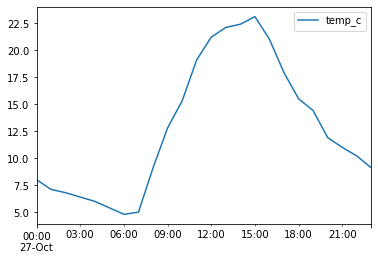

In [101]:
temp.plot()

You can pass in many optional parameters into this .plot() method. The default kind of plot is a line graph, and so if I run this, we’ll get the exact same thing.

We can also, say, pass in the line color, which for example, we can choose as green. And maybe we’d like the style of the line to be one where we’ve got markers connected by straight lines.

And maybe we want the marker colors to be, say, black. An alias for marker color is mfc for marker face color, and we can pass a k for black.

And then maybe the marker size could be, say, 10.

<AxesSubplot:>

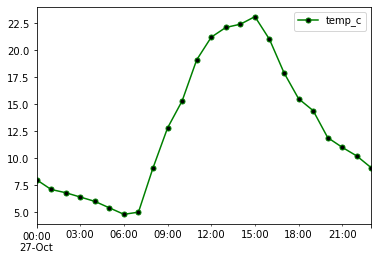

In [102]:
temp.plot(kind='line', color='g', style='.-', mfc='k', ms=10)

Now, you can directly call, instead of the .plot() method, and passing in a kind value, you can just simply use the .line() method as well, and that will do the exact same thing.

<AxesSubplot:>

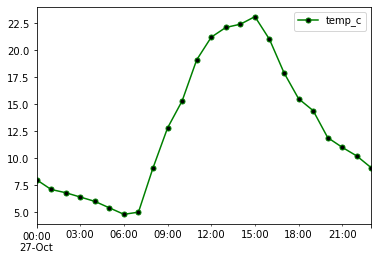

In [103]:
temp.plot.line(color='g', style='.-', mfc='k', ms=10)

Now, if you wanted to save this figure, you would first need to get the figure and then simply pass in a value for the name of the figure to the .savefig() method.

So in this case, when you run that, we also get the figure, and in your current working directory, you should have that temperatures.png file.

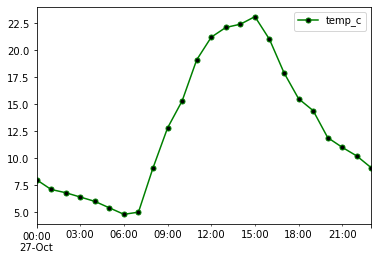

In [104]:
temp.plot.line(color='g', style='.-', mfc='k', ms=10).get_figure().savefig('temperatures.png')

Now, another type of plot is a histogram. Let’s go back to our job candidates DataFrame for this.

In [105]:
df

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,20.0,71.0,71.0,50.6
11,Ann,Ottawa,25.0,95.0,95.0,67.0
12,Jana,Prague,30.0,88.0,88.0,64.8
13,Yi,Shanghai,35.0,91.0,91.0,68.6
14,Robin,Manchester,40.0,80.0,80.0,64.0
15,Amal,Cairo,45.0,79.0,79.0,65.4
16,Nori,Osaka,50.0,77.0,77.0,66.2


And for this histogram, we’ll have 5 bins and maybe give a value to the alpha keyword argument so that the bars that are created have a little bit of transparency—say, maybe 0.8. Now here, I should specify what column, and we said let’s try this with the 'py-score'.

<AxesSubplot:ylabel='Frequency'>

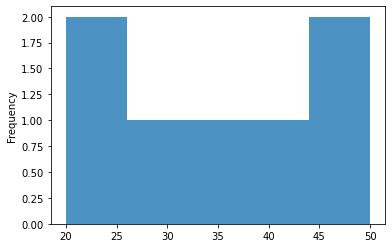

In [106]:
df['py-score'].plot.hist(bins=5, alpha=0.8)

If, instead, we use fewer bins, then we run that—again, not so interesting. 

<AxesSubplot:ylabel='Frequency'>

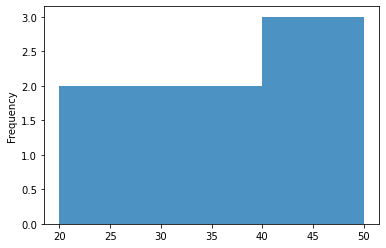

In [107]:
df['py-score'].plot.hist(bins=3, alpha=0.8)

Maybe we’ll get some more interesting plots if we, for example, do this for the histogram for, say, the 'js-score' and maybe also the 'total'.

<AxesSubplot:ylabel='Frequency'>

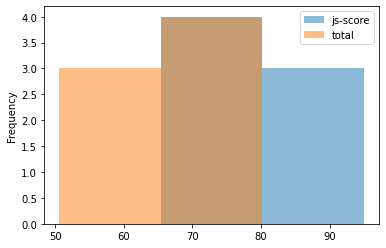

In [109]:
df[['js-score', 'total']].plot.hist(bins=3, alpha=0.5)

These graphs are pretty basic, but if you’ve got data that’s a lot more interesting, you definitely want to read up on all the optional parameters that you can pass in the different plotting functions in Matplotlib.